<p><h1><center>Prediction of Buying Behavior</center></h1></p>
<p><h3><center>Analyzing data for potential insight to inform a “free-to-fee” strategy. Looking into factors that affect users’ decisions to pay for a premium subscription. Findings quantified the effect of social engagement on revenue, as well as how valuable a premium subscriber can be in a freemium social community.</center></h3></p>

<h2><a href="https://github.com/mpavlenk/Prediction-of-buying-behavior">Data file</a><h2>
<h3><strong>INDEX:</strong><br></h3>
<p>1: <a href="#Descriptive-statistics">Descriptive statistics</a><br>
2: <a href="#Visualizations">Visualizations</a><br>
3: <a href="#Propensity Score Matching (PSM)">Propensity Score Matching (PSM)</a><br>
4: <a href="#Regression analysis">Regression analysis</a><br>
5: <a href="#Conclusion">Conclusion</a>

Importing libraries

In [47]:
library("dplyr")
library("psych")
library("purrr")
library("ggplot2")
library("gapminder")
library("gganimate")
library("MatchIt")
library("gridExtra")

Overview of dataset

In [3]:
data <- read.csv("HighNote Data.csv")
head(data)

ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
1,22,0,8,22.57143,0.4285714,1,0,9687,194,0,1,8,0,59,1
2,35,0,2,28.00000,1.0000000,2,0,0,0,0,0,0,0,35,0
3,27,1,2,23.00000,1.0000000,1,0,508,0,0,1,2,0,42,0
4,21,0,28,22.94737,0.5000000,7,1,1357,32,0,0,1,0,25,0
5,24,0,65,22.28302,0.9137931,9,0,89984,20,2,0,81,0,67,0
6,21,1,12,25.00000,0.7777778,1,0,124547,10,0,1,2,0,53,1


In [4]:
# No categorical variables in the dataset
glimpse(data)

Observations: 43,827
Variables: 16
$ ID                    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
$ age                   <int> 22, 35, 27, 21, 24, 21, 20, 23, 24, 34, 20, 2...
$ male                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...
$ friend_cnt            <int> 8, 2, 2, 28, 65, 12, 15, 57, 4, 13, 18, 2, 3,...
$ avg_friend_age        <dbl> 22.57143, 28.00000, 23.00000, 22.94737, 22.28...
$ avg_friend_male       <dbl> 0.4285714, 1.0000000, 1.0000000, 0.5000000, 0...
$ friend_country_cnt    <int> 1, 2, 1, 7, 9, 1, 1, 14, 1, 3, 11, 1, 2, 2, 8...
$ subscriber_friend_cnt <int> 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...
$ songsListened         <int> 9687, 0, 508, 1357, 89984, 124547, 24852, 998...
$ lovedTracks           <int> 194, 0, 0, 32, 20, 10, 391, 125, 42, 82, 15, ...
$ posts                 <int> 0, 0, 0, 0, 2, 0, 6, 89, 0, 0, 4, 0, 0, 0, 0,...
$ playlists             <int> 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...
$ shouts         

<h1><font color="red"><center id=Descriptive-statistics">Descriptive statistics<a class="anchor-link" href="#"Descriptive-statistics">&#182;</a><center></font></h1>

In [5]:
#Descriptive statistics for key variables split by adopter
# Descriptive statistics for adopter and nonadpoter have different outputs. The mean values of the key variables for 
# adopter sample  are higher in comparison to the ones of nonadopter sample. The variance of values is generally higher in
# adopter sample, therefore the kurtosis is lower than in nonadopter sample, which means the distribution is less 
# sharpenned. Adopter mean is greater than adopter median which indicates that the disctribution is skewed to the right. 
# The same refers to nonadapter sample. The samples  have the same min values. Maximum values are higher in nonadopter 
# sample which laso explains their higher range. 
# With all said, we can conclude some facts about the samples: 
# Premium suscribers (adopters) are slighly older than free users (nonadopters) in its majority, with more male 
# population than nonadopters, they have significantly more friends both free and premium users. They are much more 
# engaged with the Highnote content. Premium subscribers also have longer experience with Highnote and its population is
# less US, UK and Germany users as it is observed among free users.
keydata<-subset(data, select=-c(ID, avg_friend_age,avg_friend_male,friend_country_cnt))
keydata %>% split(.$adopter) %>% map(describe)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
age,1,40300,2.394844e+01,6.371831e+00,23,2.309355e+01,4.4478,8,79,71,1.96742309,6.7954029,3.174035e-02
male,2,40300,6.218610e-01,4.849286e-01,1,6.523263e-01,0.0000,0,1,1,-0.50258131,-1.7474554,2.415601e-03
friend_cnt,3,40300,1.849166e+01,5.748117e+01,7,1.028074e+01,7.4130,1,4957,4956,32.67366911,2087.4244081,2.863341e-01
subscriber_friend_cnt,4,40300,4.174690e-01,2.418151e+00,0,1.255893e-01,0.0000,0,309,309,72.19357997,8024.6170660,1.204567e-02
songsListened,5,40300,1.758944e+04,2.841602e+04,7440,1.181764e+04,10576.8684,0,1000000,1000000,6.04954176,105.8459637,1.415503e+02
lovedTracks,6,40300,8.682263e+01,2.635804e+02,14,3.635102e+01,20.7564,0,12522,12522,13.11545425,335.9317889,1.312988e+00
posts,7,40300,5.293002e+00,1.043094e+02,0,2.254342e-01,0.0000,0,12309,12309,73.91520131,7005.3350036,5.196023e-01
playlists,8,40300,5.492804e-01,1.071956e+00,0,4.463400e-01,0.0000,0,98,98,28.21141801,1945.2787423,5.339791e-03
shouts,9,40300,2.997266e+01,1.506898e+02,4,8.841563e+00,4.4478,0,7736,7736,22.53491092,779.1226978,7.506393e-01
adopter,10,40300,0.000000e+00,0.000000e+00,0,0.000000e+00,0.0000,0,0,0,NaN,NaN,0.000000e+00


In [6]:
#Let's look at the differences in the mean values of the variables in the adopter vs non-adapter subsamples.
lapply(data[,c('age','male' , 'friend_cnt' , 'avg_friend_male' ,'avg_friend_age', 
               'friend_country_cnt'  , 'songsListened' , 'lovedTracks' , 
               'posts' , 'playlists' ,'shouts' , 'tenure' ,'good_country', 'subscriber_friend_cnt')], function(i) t.test(i ~ data$adopter))

$age

	Welch Two Sample t-test

data:  i by data$adopter
t = -16.996, df = 4079.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.265768 -1.797097
sample estimates:
mean in group 0 mean in group 1 
       23.94844        25.97987 


$male

	Welch Two Sample t-test

data:  i by data$adopter
t = -13.654, df = 4295, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.12278707 -0.09195413
sample estimates:
mean in group 0 mean in group 1 
      0.6218610       0.7292316 


$friend_cnt

	Welch Two Sample t-test

data:  i by data$adopter
t = -10.646, df = 3675.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -25.15422 -17.32999
sample estimates:
mean in group 0 mean in group 1 
       18.49166        39.73377 


$avg_friend_male

	Welch Two Sample t-test

data:  i by data$adopter


<h1><font color="red"><center id="Visualizations">Visualizations<a class="anchor-link" href="#Visualizations">&#182;</a><center></font></h1>

#### Demographics

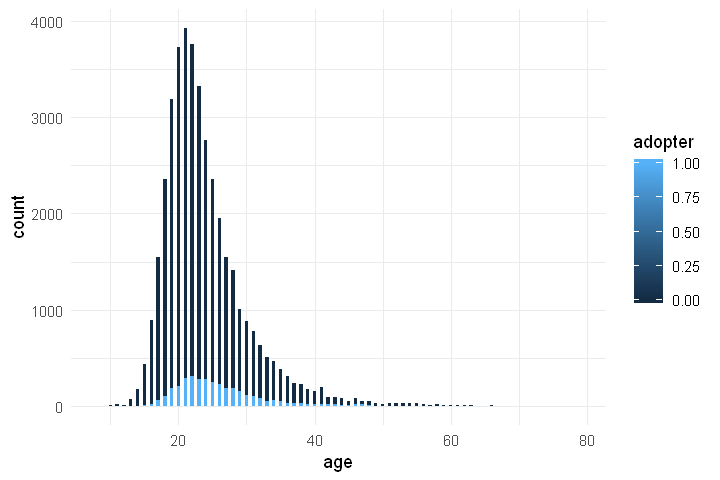

In [62]:
# majority of non-adopters population are users between 18-30 years, and by count this population is much larger 
# than population of adopters.
# Adopters are generally a little older than nonadopters by 2-3 years.
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data,aes(x=age,group=adopter,fill=adopter))+
  geom_histogram(position="identity",binwidth=0.5)+theme_minimal()

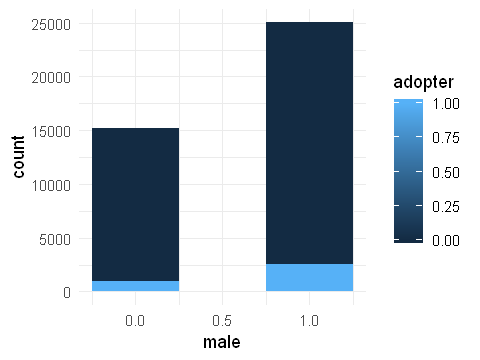

In [64]:
# Male population substencially prevails in both samples, by count we notice that adopter is a much smaller sample 
# than non-adopter. 
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data,aes(x=male,group=adopter,fill=adopter))+
  geom_histogram(position="identity",binwidth=0.5)+theme_minimal()

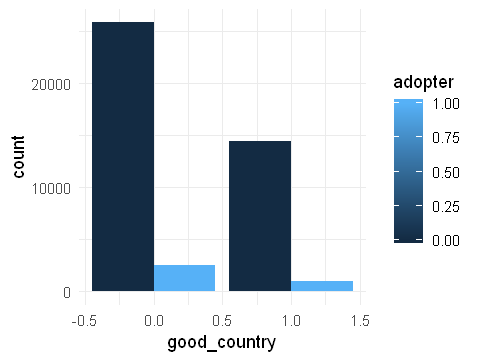

In [65]:
# Both samples have more users from the rest of the world and much fewer users are from US, UK, Germany. 
ggplot(data,aes(x=good_country,group=adopter,fill=adopter))+
  geom_bar(position="dodge")+theme_minimal()

#### Peer influence

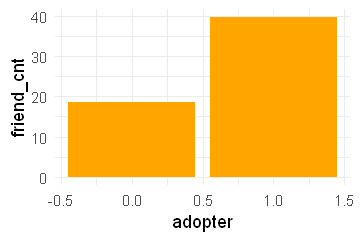

In [48]:
# In general, average amount of friends for adopters is around 40, whereas for non-adopters it is twice as less around 
# 18 friends per user.
options(repr.plot.width=3, repr.plot.height=2)
friend_cnt<-data %>%
  group_by(adopter)%>%
  summarise(friend_cnt=mean(friend_cnt))
ggplot(friend_cnt,aes(x = adopter,y=friend_cnt)) +
  geom_bar(stat="identity",position=position_identity(), fill="orange")+theme_minimal()

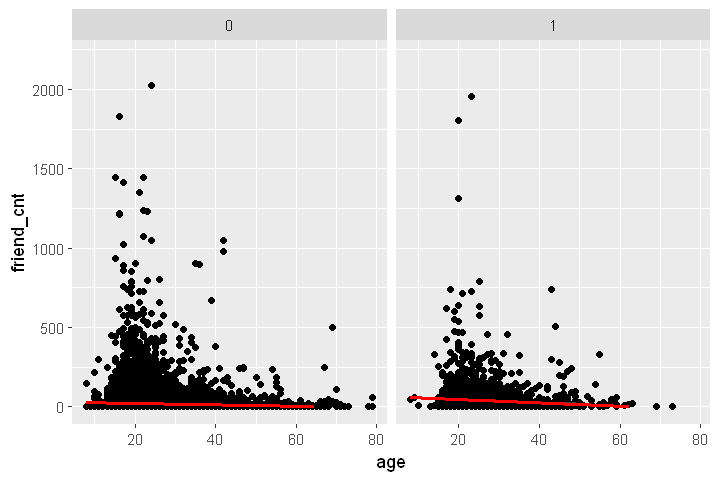

In [66]:
# Both samples demonstrate similar social characteristics in dependance with age: the younger the user, 
# the more friends he has and vs the older the user, the less friends he has. Users with highest amount 
# of friends are aged between 15 and 35 and users aged 55-65 have smallest friends list.
options(repr.plot.width=6, repr.plot.height=4)
m<-ggplot(data, aes(x = age, y = friend_cnt)) + 
  geom_point() +
  facet_wrap(~ adopter)+
  ylim(c(0, 2200))+
  geom_smooth(method = 'lm', color='red')
suppressWarnings(print(m))

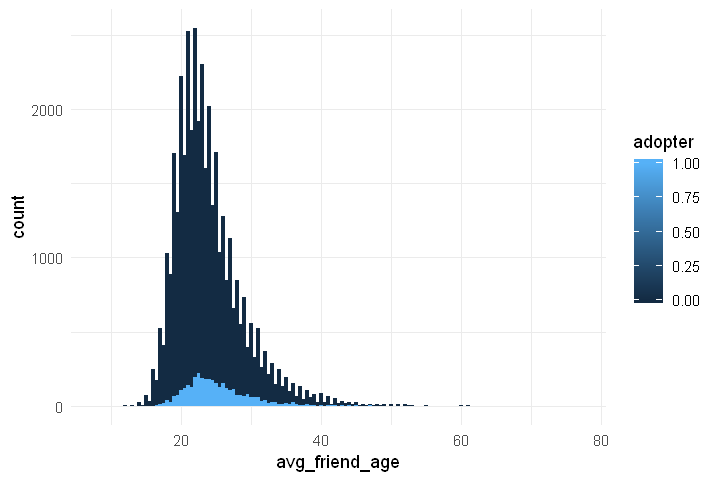

In [12]:
# Average friends' age for majority adopters and non-adopters is around the same 15-45 years old.
ggplot(data,aes(x=avg_friend_age,group=adopter,fill=adopter))+
  geom_histogram(position="identity",binwidth=0.5)+theme_minimal()

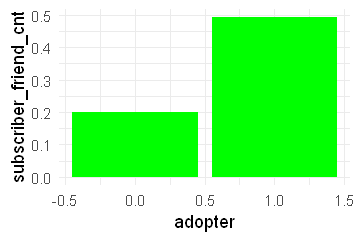

In [49]:
# Adopters have around three times more friends who are premium subscribers than non-adopters.
subscriber_friend_cnt<-data %>%
  group_by(adopter)%>%
  summarise(subscriber_friend_cnt=mean(subscriber_friend_cnt))
ggplot(subscriber_friend_cnt,aes(x = adopter,y=subscriber_friend_cnt)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

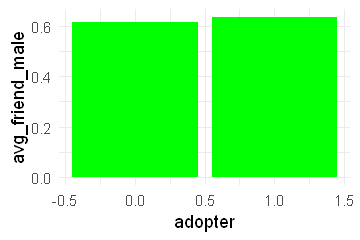

In [50]:
# Male-female distribution among 2 samples is very similar with slight difference in favor of males in adopters.
avg_friend_male<- data %>%
  group_by(adopter)%>%
  summarise(avg_friend_male=mean(avg_friend_male))
ggplot(avg_friend_male,aes(x = adopter,y=avg_friend_male)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

#### User engagement

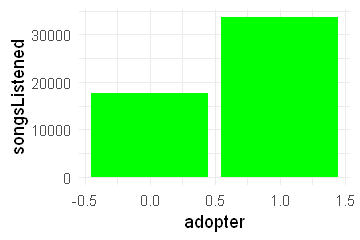

In [51]:
# Adopters demonstrate a significantly higher engagement than non-adopters. On average, they listen to around 34K songs, 
# whereas non-adopters listen to twice as less around 18K songs.
songsListened<- data %>%
  group_by(adopter)%>%
  summarise(songsListened=mean(songsListened))
ggplot(songsListened,aes(x = adopter,y=songsListened)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

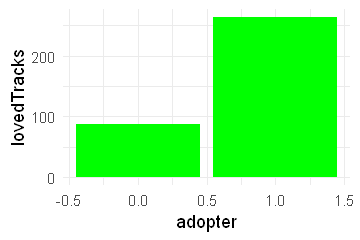

In [52]:
# LovedTracks follows the same tendency. Though the gap between the two samples is even higher: appx. 260 vs 86.
lovedTracks<- data %>%
  group_by(adopter)%>%
  summarise(lovedTracks=mean(lovedTracks))
ggplot(lovedTracks,aes(x = adopter,y=lovedTracks)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

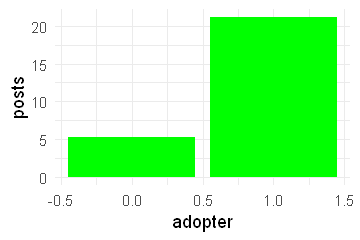

In [53]:
# Adopters post much more than non-adopters. On average, premium users have 21 posts, whilst free users around 5.
posts<-data %>%
  group_by(adopter)%>%
  summarise(posts=mean(posts))
ggplot(posts,aes(x = adopter,y=posts)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

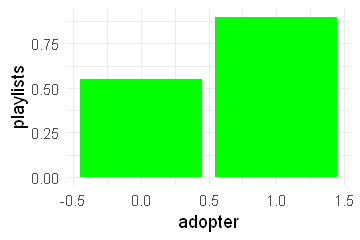

In [54]:
# Adopters on average have around 0.9 playlists, while non-adopters only around 0.55.
playlists<-data %>%
  group_by(adopter)%>%
  summarise(playlists=mean(playlists))
ggplot(playlists,aes(x = adopter,y=playlists)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

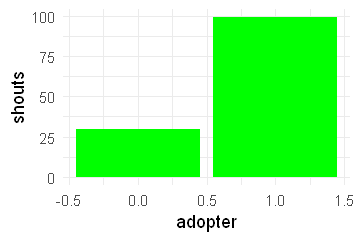

In [55]:
# Adopters received on average around 100 shouts from other users, while non-adopters received around 30 shouts.
shouts<-data %>%
  group_by(adopter)%>%
  summarise(shouts=mean(shouts))
ggplot(shouts,aes(x = adopter,y=shouts)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

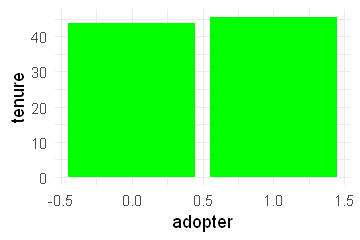

In [56]:
# On average, adopters have been on the site for around 46 months, while non-adopters around 43.
tenure<- data %>%
  group_by(adopter)%>%
  summarise(tenure=mean(tenure))
ggplot(tenure,aes(x = adopter,y=tenure)) +
  geom_bar(stat="identity",position=position_identity(), fill="green")+theme_minimal()

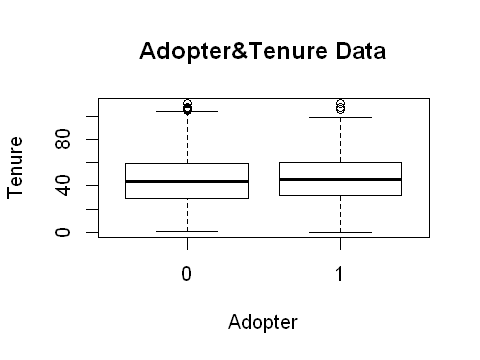

In [68]:
# Boxplot proves the conclusion about mean values of tenure variable.
options(repr.plot.width=4, repr.plot.height=3)
boxplot(tenure~adopter,data=data, main="Adopter&Tenure Data", 
        xlab="Adopter", ylab="Tenure")

In [22]:
# Binning age into groups
data$age_group<-as.list(data$age)
newdf <- data %>%
  mutate(age_group = case_when(
    age_group > 0 & age_group<= 17 ~ "1",
    age_group > 17 & age_group <=34 ~ "2",
    age_group > 34 & age_group <=49   ~ "3",
    age_group > 49 & age_group <= 64  ~ "4",
    age_group > 64  ~ "5",
    TRUE                                 ~ "NA"
  ))

In [69]:
# The following dynamic graph demonstrates user activity (songsListened) by age group throughout their time on site.
# For adopter sample, the groups 2 and 3 listened more songs, while the groups 1,2,3 are more active in non-adopter sample. Group 2 shows the highest level of engagement for both samples.
gif<-ggplot(newdf, aes(age_group, songsListened, colour = good_country)) +
  geom_point(alpha = 1, show.legend = FALSE) +
  scale_size(range = c(12)) +
  facet_wrap(~adopter) +
  labs(title = 'Tenure: {frame_time}', x = 'age_group', y = 'songsListened') +
  transition_time(tenure) +
  ease_aes('linear')+
  ylim(c(0,200000))
suppressWarnings(print(gif))

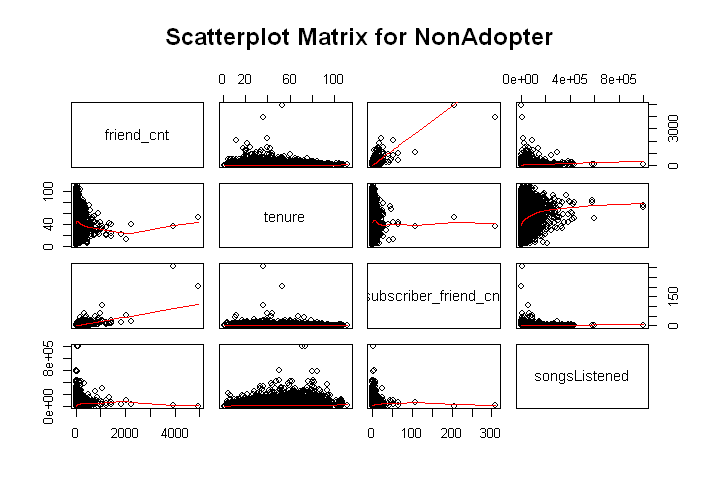

In [24]:
# This scatterplot matrix demonstrates relationships between different variables for free users (nonadopters).
# We can see linear relationships between friends and premium user friends for both samples which indicates the more 
# friends a user has the more likely he will have premium users as his friends.
# The more time a user spent on site, the more songs a user listened.
adopter<-filter(data, adopter==1)
nonadopter<-filter(data, adopter==0)
pairs(~friend_cnt+tenure+subscriber_friend_cnt+songsListened, data=nonadopter,lower.panel = panel.smooth, upper.panel = panel.smooth,
      main="Scatterplot Matrix for NonAdopter")

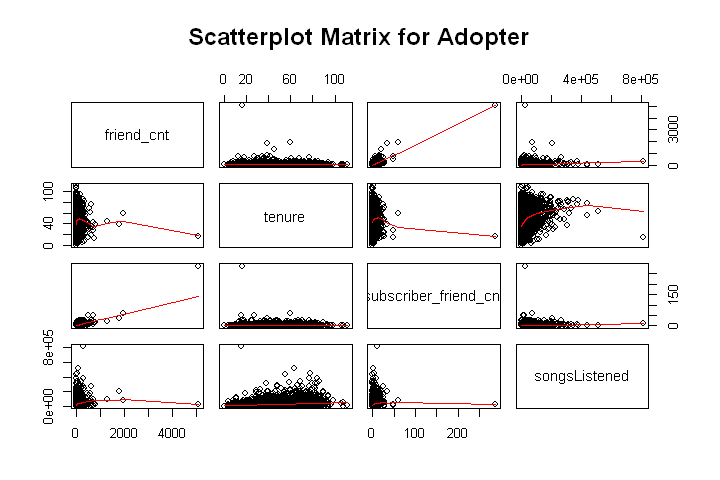

In [25]:
# This matrix demonstrates relationships between different variables for premium users (adopters)
pairs(~friend_cnt+tenure+subscriber_friend_cnt+songsListened, data=adopter,lower.panel = panel.smooth, upper.panel = panel.smooth,
      main="Scatterplot Matrix for Adopter")

<h1><font color="red"><center id="Propensity Score Matching (PSM)">Propensity Score Matching (PSM)<a class="anchor-link" href="#Propensity Score Matching (PSM)">&#182;</a><center></font></h1>

In [26]:
# Grouping subscriber_friend_cnt into "treatment" group (1) and "control" group (0)
data$subscriber_friend_cnt <- ifelse(data$subscriber_friend_cnt >0,1,0)

In [27]:
# T-test for subscriber_friend_cnt by adopter
# Means of treatment and control groups are significantly different.
with(data, t.test(subscriber_friend_cnt ~ adopter))


	Welch Two Sample t-test

data:  subscriber_friend_cnt by adopter
t = -33.978, df = 3931.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3109641 -0.2770354
sample estimates:
mean in group 0 mean in group 1 
      0.2004715       0.4944712 


In [57]:
# Estimating means of covariates
data_cov <- c('age', 'male', 'good_country', 'friend_cnt', 'avg_friend_age', 'avg_friend_male', 'friend_country_cnt', 'songsListened', 'lovedTracks', 'posts', 'playlists', 'shouts', 'tenure' )
data %>%
  group_by(adopter) %>%
  select(one_of(data_cov)) %>%
  summarise_all(funs(mean(., na.rm = T)))

Adding missing grouping variables: `adopter`


adopter,age,male,good_country,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,songsListened,lovedTracks,posts,playlists,shouts,tenure
0,23.94844,0.6218610,0.3577916,18.49166,24.01142,0.6165888,3.957891,17589.44,86.82263,5.293002,0.5492804,29.97266,43.80993
1,25.97987,0.7292316,0.2874965,39.73377,25.44131,0.6365983,7.188829,33758.04,264.34080,21.200454,0.9007655,99.43975,45.58322


In [29]:
# Propensity score estimation
m_pscore <- suppressWarnings(glm(subscriber_friend_cnt ~ age + male + good_country + 
                  friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + 
                  songsListened + lovedTracks + posts + playlists + shouts + tenure,
                family = binomial(), data = data))

In [30]:
summary(m_pscore)


Call:
glm(formula = subscriber_friend_cnt ~ age + male + good_country + 
    friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + 
    songsListened + lovedTracks + posts + playlists + shouts + 
    tenure, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4206  -0.5671  -0.4220  -0.3001   2.5619  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -5.144e+00  7.703e-02 -66.782  < 2e-16 ***
age                 1.970e-02  2.808e-03   7.015 2.30e-12 ***
male                4.311e-02  2.998e-02   1.438 0.150419    
good_country        3.201e-02  2.922e-02   1.096 0.273235    
friend_cnt          3.132e-02  1.034e-03  30.301  < 2e-16 ***
avg_friend_age      7.955e-02  3.481e-03  22.850  < 2e-16 ***
avg_friend_male     2.514e-01  5.029e-02   4.999 5.75e-07 ***
friend_country_cnt  1.110e-01  4.765e-03  23.302  < 2e-16 ***
songsListened       6.906e-06  5.156e-07  13.396  < 2e-

In [31]:
prscore_df <- data.frame(pr_score = predict(m_pscore, type = "response"),
                         subscriber_friend_cnt = m_pscore$model$subscriber_friend_cnt)
head(prscore_df)

pr_score,subscriber_friend_cnt
0.08597334,0
0.14417767,0
0.08217010,0
0.23894067,1
0.69552208,0
0.22306633,0


In [32]:
head(m_pscore$model)

subscriber_friend_cnt,age,male,good_country,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,songsListened,lovedTracks,posts,playlists,shouts,tenure
0,22,0,1,8,22.57143,0.4285714,1,9687,194,0,1,8,59
0,35,0,0,2,28.00000,1.0000000,2,0,0,0,0,0,35
0,27,1,0,2,23.00000,1.0000000,1,508,0,0,1,2,42
1,21,0,0,28,22.94737,0.5000000,7,1357,32,0,0,1,25
0,24,0,0,65,22.28302,0.9137931,9,89984,20,2,0,81,67
0,21,1,1,12,25.00000,0.7777778,1,124547,10,0,1,2,53


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


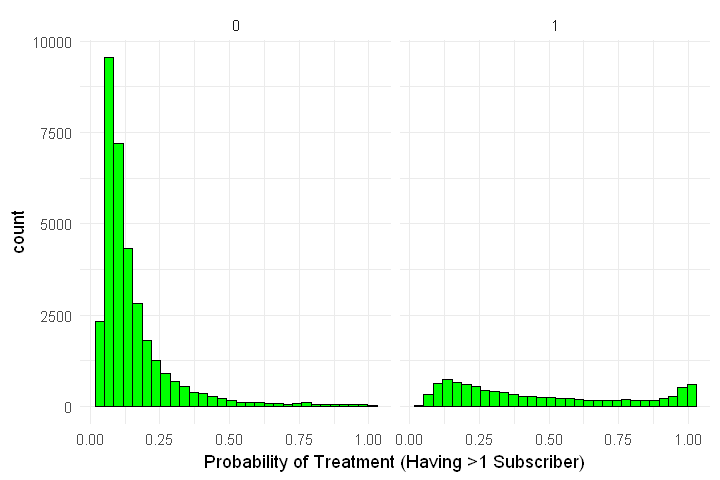

In [33]:
labs <- paste("Type of User:", c("Premium", "Non-Premium"))
pscore_df<-prscore_df %>%
  mutate(adopter = ifelse(subscriber_friend_cnt == 1, labs[1], labs[2]))
ggplot(prscore_df,aes(x = pr_score)) +
  geom_histogram(color="black", fill="green") +
  facet_wrap(~subscriber_friend_cnt) +
  xlab("Probability of Treatment (Having >1 Subscriber)") +
  theme_minimal() 

In [34]:
#Looking for pairs of observations with similar propensity scores
data_nomiss <- data %>%  
  select(subscriber_friend_cnt, adopter, one_of(data_cov)) %>%
  na.omit()

match <- suppressWarnings(matchit(subscriber_friend_cnt ~ age + male + good_country + friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + songsListened + lovedTracks + posts + playlists + shouts + tenure,
                 method = "nearest", data = data_nomiss))

In [35]:
# Information if matching was successful
summary(match)


Call:
matchit(formula = subscriber_friend_cnt ~ age + male + good_country + 
    friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + 
    songsListened + lovedTracks + posts + playlists + shouts + 
    tenure, data = data_nomiss, method = "nearest")

Summary of balance for all data:
                   Means Treated Means Control SD Control  Mean Diff    eQQ Med
distance                  0.4635        0.1550     0.1436     0.3086     0.2506
age                      25.3732       23.7476     6.2245     1.6256     1.0000
male                      0.6363        0.6288     0.4831     0.0074     0.0000
good_country              0.3433        0.3547     0.4784    -0.0114     0.0000
friend_cnt               54.0210       10.4313    15.2769    43.5896    22.0000
avg_friend_age           25.3904       23.7614     5.0577     1.6291     1.5909
avg_friend_male           0.6358        0.6131     0.3343     0.0227     0.0738
friend_country_cnt        9.3856        2.7251     3.1024 

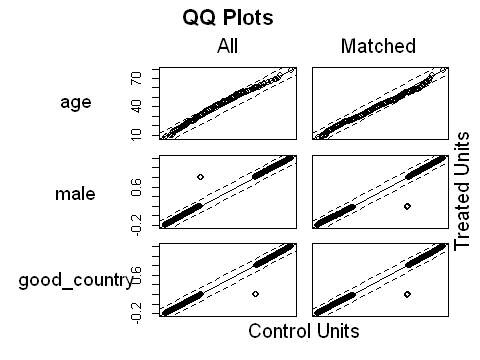

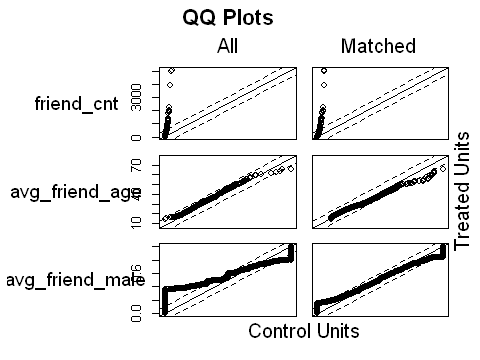

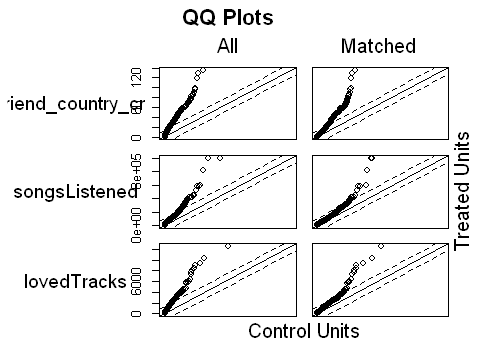

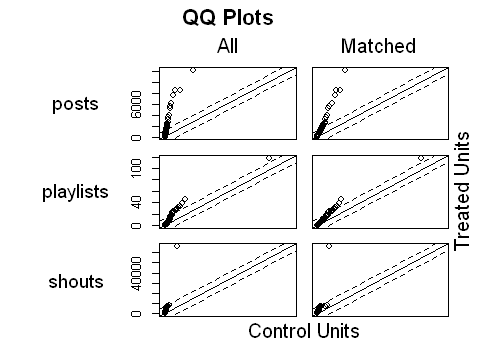

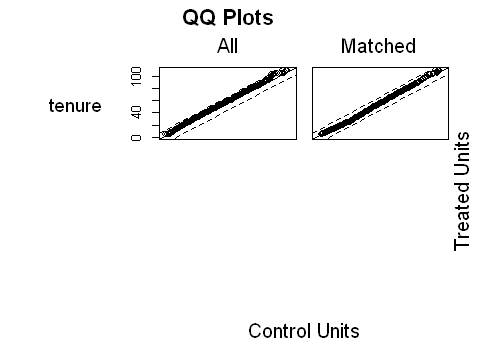

In [67]:
options(repr.plot.width=4, repr.plot.height=3)
plot(match)

In [37]:
# dataframe with only matched observations
df_matched <- match.data(match)
head(df_matched)

,subscriber_friend_cnt,adopter,age,male,good_country,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,songsListened,lovedTracks,posts,playlists,shouts,tenure,distance,weights
1,0,0,22,0,1,8,22.57143,0.4285714,1,9687,194,0,1,8,59,0.08597334,1
4,1,0,21,0,0,28,22.94737,0.5000000,7,1357,32,0,0,1,25,0.23894067,1
5,0,0,24,0,0,65,22.28302,0.9137931,9,89984,20,2,0,81,67,0.69552208,1
6,0,0,21,1,1,12,25.00000,0.7777778,1,124547,10,0,1,2,53,0.22306633,1
7,0,0,20,0,1,15,22.00000,0.6363636,1,24852,391,6,1,67,56,0.12644080,1
8,1,0,23,1,0,57,23.63636,0.5208333,14,99877,125,89,1,44,71,0.79381453,1


In [38]:
# examining difference in covariate means of the matched sample
df_matched%>%
  group_by(subscriber_friend_cnt) %>%
  select(one_of(data_cov)) %>%
  summarise_all(funs(mean))

Adding missing grouping variables: `subscriber_friend_cnt`


subscriber_friend_cnt,age,male,good_country,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,songsListened,lovedTracks,posts,playlists,shouts,tenure
0,26.33238,0.6576402,0.3581391,21.46656,26.55723,0.6551451,5.091418,27360.86,134.5440,6.277308,0.6722997,37.23618,47.70386
1,25.37321,0.6362618,0.3432760,54.02097,25.39043,0.6358077,9.385626,33735.64,225.3647,20.522956,0.7440700,101.81951,46.54871


In [39]:
lapply(data_cov, function(v) {
  t.test(df_matched[, v] ~ df_matched$subscriber_friend_cnt)
})

[[1]]

	Welch Two Sample t-test

data:  df_matched[, v] by df_matched$subscriber_friend_cnt
t = 9.0201, df = 19340, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.750746 1.167609
sample estimates:
mean in group 0 mean in group 1 
       26.33238        25.37321 


[[2]]

	Welch Two Sample t-test

data:  df_matched[, v] by df_matched$subscriber_friend_cnt
t = 3.1356, df = 19640, p-value = 0.001718
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.008014461 0.034742334
sample estimates:
mean in group 0 mean in group 1 
      0.6576402       0.6362618 


[[3]]

	Welch Two Sample t-test

data:  df_matched[, v] by df_matched$subscriber_friend_cnt
t = 2.183, df = 19642, p-value = 0.02905
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.001517727 0.028208426
sample estimates:
mean in group 0 mean in group 1 
      0.3

In [40]:
# Estimating treatment effects using Visual Inspection
fn_bal <- function(df_matched, variable) {
  df_matched$variable <- df_matched[, variable]
  df_matched$subscriber_friend_cnt <- as.factor(df_matched$subscriber_friend_cnt)
  support <- c(min(df_matched$variable), max(df_matched$variable))
  ggplot(df_matched, aes(x = distance, y = variable, color = subscriber_friend_cnt)) +
    geom_point(alpha = 0.2, size = 1.3) +
    geom_smooth(method = "loess", se = F) +
    xlab("Propensity score") +
    ylab(variable) +
    theme_bw() +
    ylim(support)
}

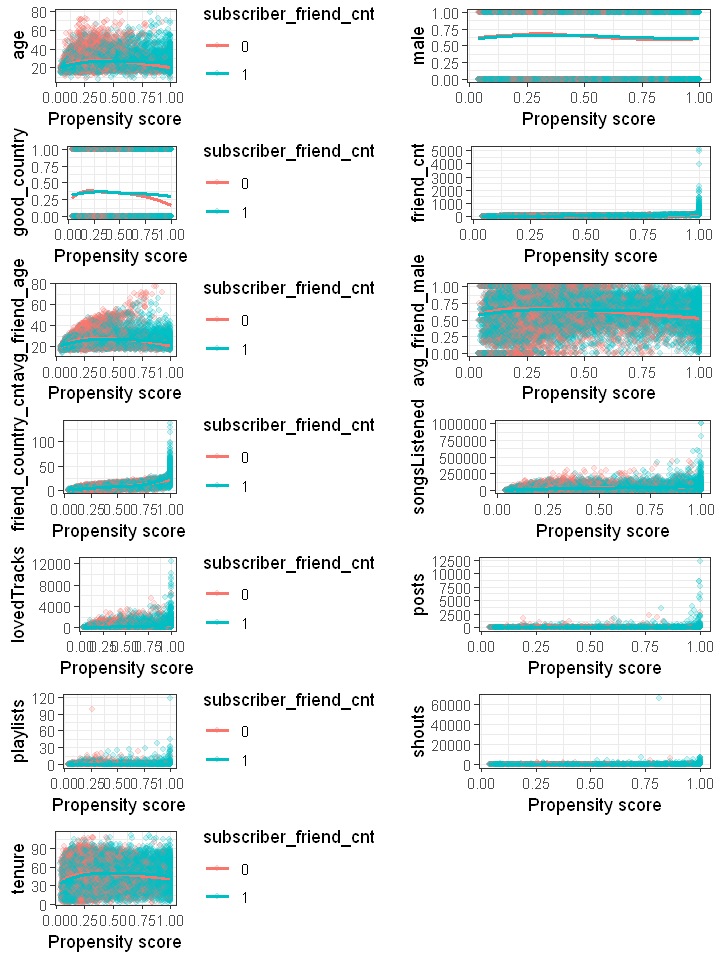

In [58]:
options(repr.plot.width=6, repr.plot.height=8)
suppressWarnings(grid.arrange(
  fn_bal(df_matched, "age"),
  fn_bal(df_matched, "male") + theme(legend.position = "none"),
  fn_bal(df_matched, "good_country"),
  fn_bal(df_matched, "friend_cnt") + theme(legend.position = "none"),
  fn_bal(df_matched, "avg_friend_age"),
  fn_bal(df_matched, "avg_friend_male") + theme(legend.position = "none"),
  fn_bal(df_matched, "friend_country_cnt"),
  fn_bal(df_matched, "songsListened") + theme(legend.position = "none"),
  fn_bal(df_matched, "lovedTracks"),
  fn_bal(df_matched, "posts") + theme(legend.position = "none"),
  fn_bal(df_matched, "playlists"),
  fn_bal(df_matched, "shouts") + theme(legend.position = "none"),
  fn_bal(df_matched, "tenure"),
  nrow = 7, widths = c(1, 0.8)
))

In [42]:
# Estimating treatment effects using t-test
# T-test in adopter group 0.18 is higher than the one in non-adopter 0.09, which proves the hypothesis that having 
# subscriber friends affects the likelihood of becoming an adopter 
with(df_matched, t.test(adopter ~ subscriber_friend_cnt))


	Welch Two Sample t-test

data:  adopter by subscriber_friend_cnt
t = -18.938, df = 18060, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10009352 -0.08131745
sample estimates:
mean in group 0 mean in group 1 
     0.08683702      0.17754250 


In [43]:
# OLS without covariates
treat_wt <- lm(adopter ~ subscriber_friend_cnt, data = df_matched)
summary(treat_wt)


Call:
lm(formula = adopter ~ subscriber_friend_cnt, data = df_matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17754 -0.17754 -0.08684 -0.08684  0.91316 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.086837   0.003387   25.64   <2e-16 ***
subscriber_friend_cnt 0.090705   0.004790   18.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3357 on 19644 degrees of freedom
Multiple R-squared:  0.01793,	Adjusted R-squared:  0.01788 
F-statistic: 358.7 on 1 and 19644 DF,  p-value: < 2.2e-16


In [44]:
# with covariates
treat_with<- lm(adopter ~ subscriber_friend_cnt +  age + male + good_country + friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + songsListened + lovedTracks + posts + playlists + shouts + tenure, data = df_matched)
summary(treat_with)


Call:
lm(formula = adopter ~ subscriber_friend_cnt + age + male + good_country + 
    friend_cnt + avg_friend_age + avg_friend_male + friend_country_cnt + 
    songsListened + lovedTracks + posts + playlists + shouts + 
    tenure, data = df_matched)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27876 -0.15553 -0.10616 -0.05705  1.00012 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.618e-02  1.338e-02  -2.705 0.006844 ** 
subscriber_friend_cnt  7.663e-02  4.901e-03  15.635  < 2e-16 ***
age                    1.764e-03  4.596e-04   3.838 0.000125 ***
male                   3.070e-02  5.125e-03   5.991 2.12e-09 ***
good_country          -3.889e-02  5.014e-03  -7.756 9.22e-15 ***
friend_cnt            -1.620e-05  3.595e-05  -0.451 0.652317    
avg_friend_age         1.556e-03  5.799e-04   2.684 0.007282 ** 
avg_friend_male        7.275e-03  9.820e-03   0.741 0.458791    
friend_country_cnt     1.055e-03  4.454e-04 

The difference in subscriber_friend_cnt coefficients between regressions with or without covariates is very small, 
which indicates that PSM reduced the bias and we were able to estimate the effect of a treatment.

<h1><font color="red"><center id="Regression analysis">Regression analysis<a class="anchor-link" href="#Regression analysis">&#182;</a><center></font></h1>

In [45]:
#Logistic Regression

result <- glm(adopter ~ male + age + subscriber_friend_cnt + friend_cnt + avg_friend_age + friend_country_cnt + songsListened + lovedTracks + good_country + playlists + tenure + shouts + posts + avg_friend_male,
              family = binomial(), data = data)
summary(result)


Call:
glm(formula = adopter ~ male + age + subscriber_friend_cnt + 
    friend_cnt + avg_friend_age + friend_country_cnt + songsListened + 
    lovedTracks + good_country + playlists + tenure + shouts + 
    posts + avg_friend_male, family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6288  -0.3990  -0.3240  -0.2678   2.7604  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.213e+00  9.562e-02 -44.062  < 2e-16 ***
male                   4.139e-01  4.175e-02   9.914  < 2e-16 ***
age                    2.103e-02  3.517e-03   5.979 2.24e-09 ***
subscriber_friend_cnt  9.719e-01  4.211e-02  23.080  < 2e-16 ***
friend_cnt            -4.584e-04  2.972e-04  -1.543 0.122942    
avg_friend_age         2.369e-02  4.637e-03   5.108 3.25e-07 ***
friend_country_cnt     1.401e-02  3.646e-03   3.843 0.000122 ***
songsListened          6.152e-06  5.212e-07  11.805  < 2e-16 ***
lovedTracks       

In [60]:
exp(result$coefficients)-1

(Intercept)                  male                   age 
        -9.851984e-01          5.127357e-01          2.125356e-02 
subscriber_friend_cnt            friend_cnt        avg_friend_age 
         1.642838e+00         -4.583346e-04          2.396873e-02 
   friend_country_cnt         songsListened           lovedTracks 
         1.411055e-02          6.152512e-06          6.150027e-04 
         good_country             playlists                tenure 
        -3.255804e-01          6.681152e-02         -4.916447e-03 
               shouts                 posts       avg_friend_male 
         7.416472e-05          1.073726e-04          1.103711e-01

<h1><font color="red"><center id="Conclusion">Conclusion<a class="anchor-link" href="#Conclusion">&#182;</a><center></font></h1>

All the variables in this regression output have low p-values, which indicate they are all significant in the model.
Most of the variables (besides tenure, friend_cnt, and good_country) have linear relationships with the adopter variable. It indicates that 
a one-unit increase in any of these variables, we expect an increase in the log-odds of the dependent variable adopter. Whereas tenure and 
goo_country have inverse relationships with adopter variable, a one-unit increase in these variables, 
we expect a decrease in the log-odds of the dependent variable.
From this analysis we can conclude that the higher peer influence (many subscriber friends, high diversity of friends), the more likely
a free user can be converted to a premium subscriber. Another condition like user engagement positively affects a
"free-to-fee" strategy. The higher engagement (songs listened, playlists, tracks, etc.) of a user, the more chances to convert him to a premium user.
Recommendations to Highnote for new subscribers:

1) target groups with high social engagement

2) motivate premuim users to attract their friends to their paid services. peer subscribers can influence their friends to subscribe for a premium account.

3) Highnote has more chances to obtain a new subscriber if they target a male in his late 20s or 30s who is not from US, UK or Germany.